In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('homeprices_banglore.csv')

In [3]:
from sklearn.preprocessing import MinMaxScaler
sx = MinMaxScaler()
sy = MinMaxScaler()

In [4]:
scaled_x = sx.fit_transform(df.drop('price',axis='columns'))
scaled_x.shape

(20, 2)

In [5]:
scaled_y = sy.fit_transform(df[['price']])

In [6]:
np.random.permutation(20)

array([17,  2, 10, 15, 13, 14, 12,  8,  3,  0,  9,  4, 19, 16,  6,  7, 11,
        1,  5, 18])

In [7]:
import random

def mini_batch_gradient_descent(x, y_true, epochs, batch_size=5, learning_rate=0.01):
    num_of_ft = x.shape[1]
    w = np.ones(shape=num_of_ft)
    b = 0
    total_samples = x.shape[0]
    
    if batch_size > total_samples:
        batch_size = total_samples
    
    
    #just for graph
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        random_index = np.random.permutation(total_samples)
        batch_x = x[random_index]
        batch_y = y_true[random_index]
        
        for j in range(0,total_samples,batch_size): #(0-20,jump 5 everytime)
            x_tmp = batch_x[j:j+batch_size]
            y_tmp = batch_y[j:j+batch_size]
        
            y_pred = np.dot(w, x_tmp.T) + b
        
            w_grad = -(2/len(x_tmp))*(np.dot(x_tmp.T,(y_tmp-y_pred)))
            b_grad = -(2/len(y_tmp))*np.sum(y_tmp-y_pred)
        
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad

            cost = np.mean(np.square(y_tmp-y_pred))
        
        if (i+1)%10==0:
            cost_list.append(cost)
            epoch_list.append(i+1)
    return w, b, cost, cost_list, epoch_list

In [8]:
w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(scaled_x, scaled_y.reshape(scaled_y.shape[0],), 120)
w, b, cost

(array([0.71013195, 0.67805224]), -0.23327018584458645, 0.0035539662230131145)

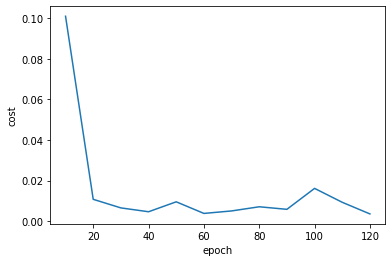

In [9]:
plt.xlabel('epoch')
plt.ylabel('cost')
plt.plot(epoch_list,cost_list)